In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import csv
import random
import statistics


In [4]:

from collections import Counter

In [5]:
#Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')


In [6]:
path = "/content/CA-GrQc.txt"
print(path)

/content/CA-GrQc.txt


In [7]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)
res

[['#',
  'Directed',
  'graph',
  '(each',
  'unordered',
  'pair',
  'of',
  'nodes',
  'is',
  'saved',
  'once):',
  'CA-GrQc.txt'],
 ['#',
  'Collaboration',
  'network',
  'of',
  'Arxiv',
  'General',
  'Relativity',
  'category',
  '(there',
  'is',
  'an',
  'edge',
  'if',
  'authors',
  'coauthored',
  'at',
  'least',
  'one',
  'paper)'],
 ['#', 'Nodes:', '5242', 'Edges:', '28980'],
 ['#', 'FromNodeId', 'ToNodeId'],
 ['3466', '937'],
 ['3466', '5233'],
 ['3466', '8579'],
 ['3466', '10310'],
 ['3466', '15931'],
 ['3466', '17038'],
 ['3466', '18720'],
 ['3466', '19607'],
 ['10310', '1854'],
 ['10310', '3466'],
 ['10310', '4583'],
 ['10310', '5233'],
 ['10310', '9572'],
 ['10310', '10841'],
 ['10310', '13056'],
 ['10310', '14982'],
 ['10310', '16310'],
 ['10310', '19640'],
 ['10310', '23855'],
 ['10310', '24372'],
 ['10310', '24814'],
 ['5052', '899'],
 ['5052', '1796'],
 ['5052', '2287'],
 ['5052', '3096'],
 ['5052', '3386'],
 ['5052', '4472'],
 ['5052', '5346'],
 ['5052', '5

In [8]:
G=nx.read_edgelist(path,nodetype=int,create_using=nx.Graph())

In [ ]:
print("No. of Nodes:",nx.number_of_nodes(G))


No. of Nodes: 5242


In [ ]:
print("No. of Edges:",nx.number_of_edges(G))


No. of Edges: 14496


In [ ]:
if(G.is_directed()):
  print("Type: Directed")
else:
  print("Type: Undirected")


Type: Undirected


In [ ]:

average_degree = sum(degree for node, degree in nx.degree(G))/len(G.nodes())

In [ ]:
print("Average Degree: ",average_degree)

Average Degree:  5.530713468141931


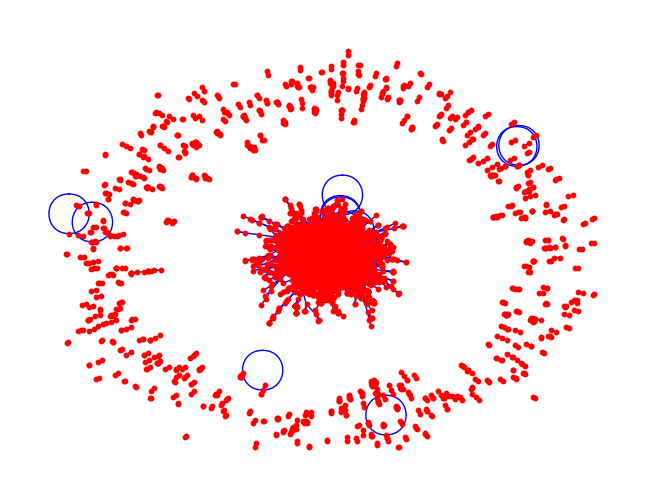

In [ ]:
nx.draw(G, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

In [ ]:
degree_dist = nx.degree_histogram(G)


In [ ]:
print(degree_dist)
print(type(degree_dist))

[0, 1196, 1114, 775, 497, 299, 225, 159, 141, 98, 92, 66, 46, 58, 38, 48, 25, 43, 20, 19, 28, 16, 12, 44, 8, 8, 7, 3, 5, 3, 8, 9, 3, 9, 37, 1, 2, 5, 1, 0, 1, 3, 19, 2, 1, 13, 2, 4, 3, 4, 0, 2, 0, 1, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1]
<class 'list'>


In [ ]:
degree_counts = Counter(degree_dist)
degrees = list(degree_counts.keys())
counts = list(degree_counts.values())

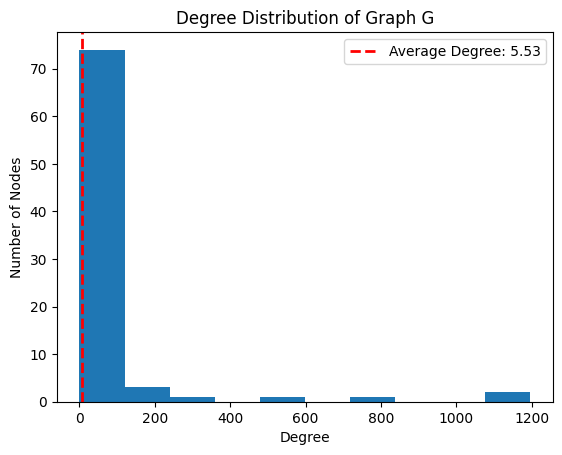

In [ ]:
plt.hist(degree_dist)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution of Graph G")
plt.axvline(x=average_degree, color='r', linestyle='dashed', linewidth=2, label=f'Average Degree: {average_degree:.2f}')
plt.legend()
plt.show()

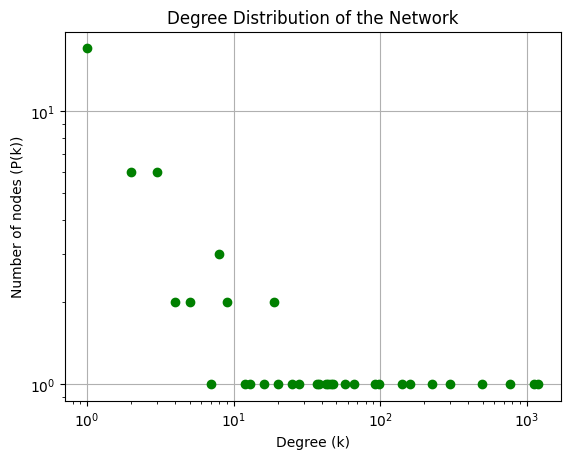

In [ ]:
# Plot the degree distribution on a log-log scale
plt.loglog(degrees, counts, marker='o',  linestyle='', color='g')
plt.xlabel("Degree (k)")
plt.ylabel("Number of nodes (P(k))")
plt.title("Degree Distribution of the Network")
plt.grid(True)
plt.show()


Min Degree:  0
Max Degree:  1196


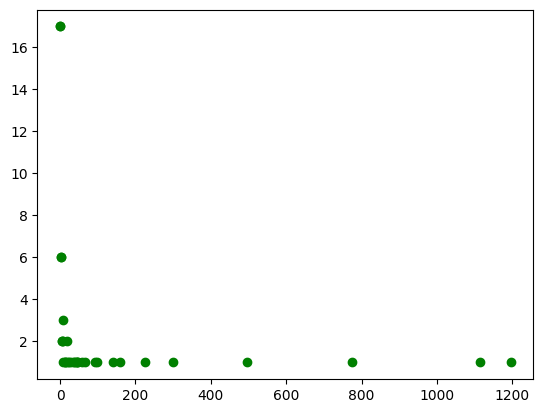

In [ ]:
plt.plot(degrees, counts, marker='o',  linestyle='', color='g')
print('Min Degree: ',min(degrees))
print('Max Degree: ',max(degrees))

In [ ]:
standard_deviation_degrees = statistics.stdev(degrees)

In [ ]:
print('Standard Deviation of Degree Distribution: ',standard_deviation_degrees)

Standard Deviation of Degree Distribution:  299.72513849404805


In [ ]:

degree_centrality = nx.degree_centrality(G)

# Find the node with the maximum degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)
max_degree_value = degree_centrality[max_degree_node]

# Print results

print("Maximum Degree Centrality:")
print(f"Node: {max_degree_node}, Degree: {max_degree_value}")


print("\nDegree of Some Nodes (Top 25):")
count = 0
for node, centrality in degree_centrality.items():
    if count < 25:
        print(f"{node}\t{centrality}")
        count += 1


Maximum Degree Centrality:
Node: 21012, Degree: 0.015455065827132226

Degree of Some Nodes (Top 25):
3466	0.0015264262545315779
937	0.0009540164090822362
5233	0.00038160656363289447
8579	0.0009540164090822362
10310	0.002480442663613814
15931	0.0019080328181644724
17038	0.003243655790879603
18720	0.0005724098454493417
19607	0.0007632131272657889
1854	0.0015264262545315779
4583	0.0005724098454493417
9572	0.006487311581759206
10841	0.0013356229727151307
13056	0.0019080328181644724
14982	0.00038160656363289447
16310	0.003243655790879603
19640	0.004770082045411181
23855	0.0015264262545315779
24372	0.00019080328181644724
24814	0.0040068689181453915
5052	0.00553329517267697
899	0.0005724098454493417
1796	0.00038160656363289447
2287	0.0026712459454302615
3096	0.0022896393817973667


AttributeError: 'NodeView' object has no attribute 'index'

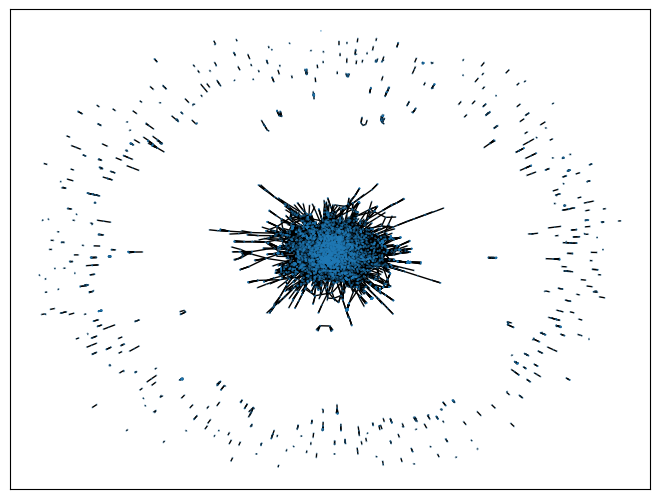

In [ ]:
# Visualization (Adjust node sizes based on degree centrality)
node_size = [degree_centrality[v] * 100 for v in G.nodes()]  # Scale node size by centrality

cmap = plt.cm.plasma


# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Degree Centrality Visualization")
plt.show()

In [ ]:
eigen_centrality_value = nx.eigenvector_centrality_numpy(G,max_iter=1000)
maximum = max(eigen_centrality_value.values())
print("Maximum eigen centrality are :")
print("Node Eigen Vector Centrality")
for node in eigen_centrality_value.keys():
  if (eigen_centrality_value[node] == maximum):
    print(f'{node}\t {eigen_centrality_value[node]}')
print("\nEigen Vector Centrality of some nodes are:\n")
print("Node \t Eigen Vector Centrality")
# sorting based on values
eigen_centrality_sorted = sorted(eigen_centrality_value, key=eigen_centrality_value.get, reverse=True)
w = 1
for q in eigen_centrality_value:
  if(w <= 25):
    w = w + 1
    print (str(q)+"\t "+str(eigen_centrality_value[q]))

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in eigen_centrality_value.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Eigenvector Centrality Visualization")
plt.show()

In [ ]:
# take sample graph for 4000 edges

df=nx.to_pandas_edgelist(G);
df_sample=df.sample(n=2000)

g=nx.from_pandas_edgelist(df_sample)
print("No. of Nodes:",nx.number_of_nodes(g))
print("No. of Edges:",nx.number_of_edges(g))

No. of Nodes: 2179
No. of Edges: 2000


In [ ]:
# Define alpha and beta parameters (adjust as needed)
alpha = 0.1  # Damping factor
beta = 1  # Node contribution

# Calculate Katz centrality
katz_cent = nx.katz_centrality(g, alpha=alpha, beta=beta,max_iter=10000)
index = max(nx.katz_centrality(g, max_iter = 20000), key = (nx.katz_centrality(g, max_iter = 20000)).get)
maximum = katz_cent[index]
print("The nodes with maximum Katz centrality are :")
print("\nNode Degree")
for node in katz_cent:
  if (katz_cent[node] == maximum):
    print(f'{node}\t{katz_cent[node]}')
print("\nSome nodes with their Katz Centrality are:")
print("\nNode Katz Centrality")
w = 1
for node in katz_cent:
  if(w <= 25):
    print(f'{node}\t{katz_cent[node]}')
    w = w + 1


The nodes with maximum Katz centrality are :

Node Degree
21281	0.0895853168441046

Some nodes with their Katz Centrality are:

Node Katz Centrality
11733	0.021171405038242896
9616	0.01791426580159014
15562	0.026473443609470734
18396	0.02072728731173058
24220	0.01755236144196206
25553	0.01755236144196206
12286	0.021171405038242896
23423	0.01791426580159014
6271	0.029537201097731242
15145	0.027087865532954204
24699	0.01952453688487914
17800	0.01952453688487914
8701	0.019343418731958186
523	0.01773146717096167
23355	0.01755236144196206
2143	0.01755236144196206
5511	0.023457448237981775
7265	0.020158744579515588
2774	0.02054375594699158
3652	0.027136945540161394
9869	0.05338578032238428
15245	0.04756778678278278
8801	0.01755236144196206
12695	0.01755236144196206
6222	0.03897607034803705


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


AttributeError: 'NodeView' object has no attribute 'index'

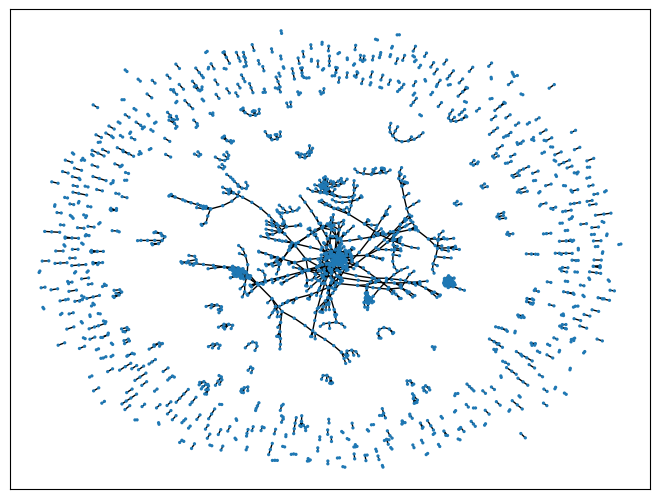

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in katz_cent.values()]  # Scale node size by centrality

# in statement above, katz_cent if cell above to above cell works




# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(g, nodelist=g.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Katz Centrality Visualization")
plt.show()

In [ ]:
#Page Rank
Page_Rank = nx.pagerank(G, max_iter = 20000)
maximum = max(Page_Rank.values())
print("Maximum Page Rank centrality are :")
print("\nNode Page Rank Centrality")
for node in Page_Rank.keys():
  if (Page_Rank[node] == maximum):
    print(f'{node}\t{Page_Rank[node]}')
print("\nPage Rank Centrality of some nodes are:")
print("\nNode Page Rank Centrality")
w = 1
for node in Page_Rank:
  if(w <= 25):
    print(f'{node}\t{Page_Rank[node]}')
    w = w + 1

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in Page_Rank.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Page Rank Centrality Visualization")
plt.show()

In [ ]:
#Betweeness Centrality
bet_cent = nx.betweenness_centrality(G)
maximum = max(bet_cent.values())
print("Maximum Betweeness Centrality are :")
print("\nNode Betweeness Centrality")
for node in bet_cent:
  if (bet_cent[node] == maximum):
    print(f'{node}\t{bet_cent[node]}')
print("\nBetweeness Centrality of some nodes are:")
print("\nNode Betweenness Centrality")
w = 1
for res in bet_cent:
  if(w <= 25):
    w = w+1
    print(str(res)+"\t"+str(bet_cent[res]))


In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in bet_cent.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Betweenness Centrality Visualization")
plt.show()

In [ ]:
#Closeness Centrality
Closeness_Centrality = nx.closeness_centrality(G)
maxi = max(Closeness_Centrality.values())
print("Maximum Closeness Centrality:")
print("\nNode Closeness Centrality")
for node in Closeness_Centrality:
  if (Closeness_Centrality[node] == maxi):
    print(f'{node}\t{Closeness_Centrality[node]}')
print("\nCloseness Centrality of some nodes:")
print("\nNode Closeness Centrality")
dict_sorted_keys = sorted(Closeness_Centrality, key=Closeness_Centrality.get, reverse=True)
w = 1
for q in dict_sorted_keys:
  if(w <= 25):
    w = w+1
    print (str(q)+"\t"+str(Closeness_Centrality[q]))

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in Closeness_Centrality.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Closeness Centrality Visualization")
plt.show()

In [ ]:
#Average local clustering coeffecient
average_local_clustering=nx.average_clustering(G)

#Local clustering coeffecient of all nodes
print('\nClustering coeffecient of some nodes are:')
print('\nNode Local Clustering Coeffecient')
w = 1
for node, val in nx.clustering(G).items():
  if(w <= 25):
    print(f'{node}\t{val}')
    w = w + 1

In [ ]:
clustering_coefficients = nx.clustering(G)

# Get LCC distribution
lcc_distribution = [val for node, val in clustering_coefficients.items()]  # Extract LCC values

# Calculate average local clustering coefficient
average_lcc = nx.average_clustering(G)

plt.hist(lcc_distribution)
plt.xlabel("Local Clustering Coefficient")
plt.ylabel("Number of Nodes")
plt.title("Distribution of Local Clustering Coefficients")

# Add reference line for average LCC
plt.axvline(x=average_lcc, color='r', linestyle='dashed', linewidth=2, label=f'Average LCC: {average_lcc:.4f}')
plt.legend()
plt.show()

In [ ]:
print("average local clustering coefficient:",average_local_clustering)

In [ ]:
# global clustering coeffecient of nodes
global_clustering = np.mean(list(nx.clustering(G).values()))

In [ ]:
print("Global clustering coefficient:",global_clustering)


In [ ]:
if(G.is_directed()):
  print("Reciprocity: ",nx.reciprocity(G))
else:
  print("Reciprocity: 1.0")


In [ ]:
def is_reciprocal(G, node1, node2):
    return G.has_edge(node2, node1)

In [ ]:
edge_colors = []
for edge in G.edges():
    if is_reciprocal(G, edge[0], edge[1]):
        edge_colors.append('blue')  # Color for reciprocal edges
    else:
        edge_colors.append('red')  # Color for non-reciprocal edges

# Create the plot with edge coloring based on reciprocity
nx.draw(G, nodelist=G.nodes(), edge_color=edge_colors, with_labels=False)
plt.title("Reciprocity Visualization")
plt.axis('off')  # Hide unnecessary axis

plt.show()

In [ ]:

#Transitivity
transitivity=nx.transitivity(G)


In [ ]:
# Create the plot with the sampled subgraph
nx.draw(G, nodelist=G.nodes(), with_labels=False)
plt.title(f"Transitivity Visualization (Sampled Subgraph, Transitivity: {transitivity:.4f})")
plt.axis('off')  # Hide unnecessary axis

plt.show()

In [ ]:

print("transitivity:",transitivity)

In [ ]:

# Comparison (Optional)
if average_local_clustering > global_clustering:
    print("The average local clustering coefficient is higher than the global clustering coefficient.")
elif average_local_clustering < global_clustering:
    print("The average local clustering coefficient is lower than the global clustering coefficient.")
else:
    print("The average local clustering coefficient is equal to the global clustering coefficient.")


In [ ]:

def find_giant_component(network):
    # Get the connected components
    components = list(nx.connected_components(network))

    # Find the largest component (giant component)
    giant_component = max(components, key=len)

    return giant_component

# Find the giant component in the scale-free network S
giant_component = find_giant_component(G)

# Print the size of the giant component
print("Size of the giant component:", len(giant_component))

Size of the giant component: 4158


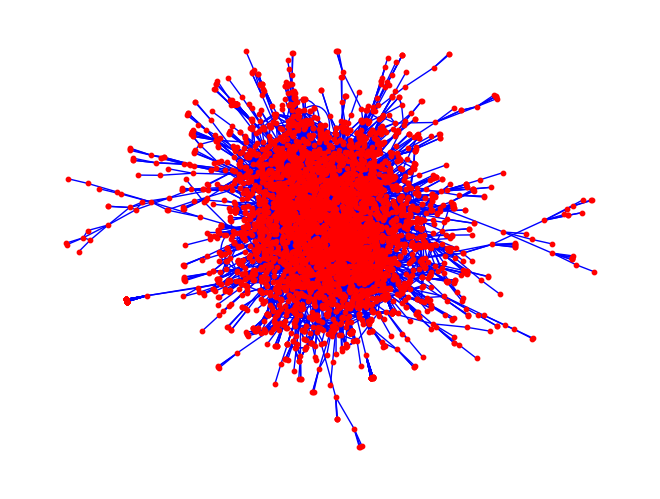

In [ ]:
# Create a subgraph consisting of the giant component
giant_component_graph = G.subgraph(giant_component)

# Draw the giant component
nx.draw(giant_component_graph, node_color='r', edge_color='b', node_size=10)
plt.show()

In [1]:

def assign_activation_probabilities(G):
    # Initialize a dictionary to store activation probabilities
    activation_probs = {}

    # Assign random probabilities for each node's neighbors
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        probabilities = [random.random() for _ in neighbors]

        # Normalize probabilities
        total_prob = sum(probabilities)
        probabilities = [prob / total_prob for prob in probabilities]

        # Store probabilities for each neighbor
        activation_probs[node] = dict(zip(neighbors, probabilities))

    return activation_probs


In [2]:
def visualize_network(network, activated_nodes):
    node_colors = ['blue' if node in activated_nodes else 'red' for node in network.nodes()]
    nx.draw(network, with_labels=False, node_color=node_colors)
    plt.show()

Iteration: # 1
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


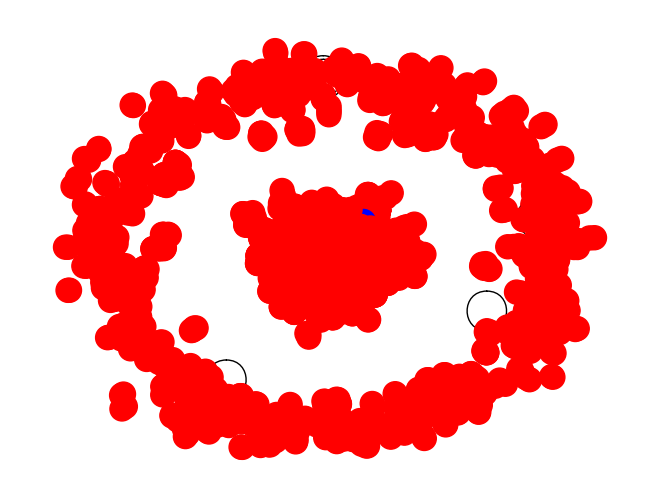

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  3


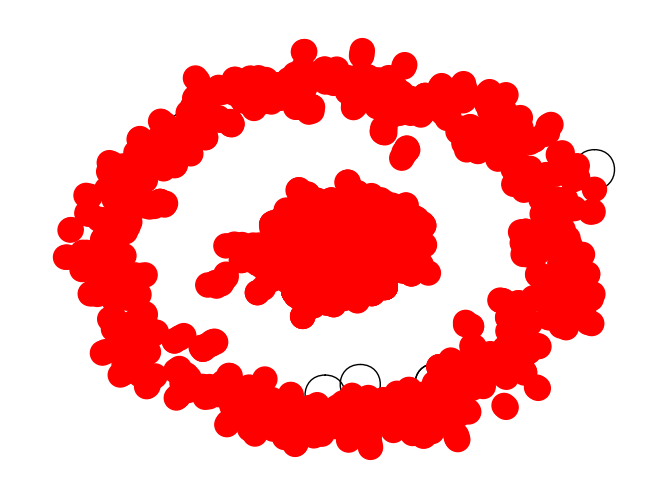

No. of nodes with information before Step: # 3  is  3
No. of nodes with information after Step: #:  3  is  6


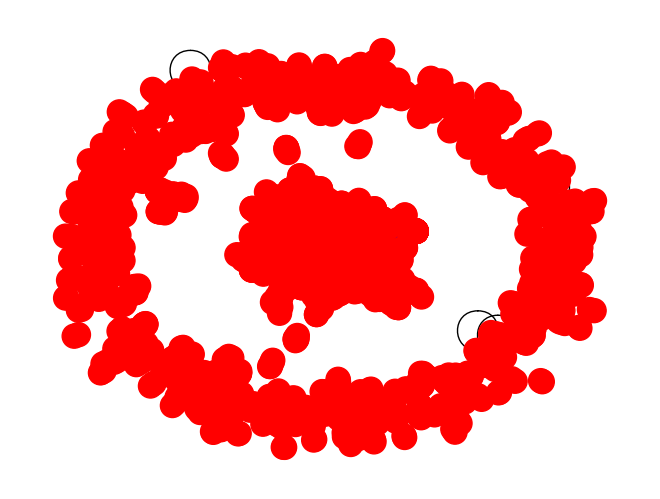

No. of nodes with information before Step: # 4  is  6
No. of nodes with information after Step: #:  4  is  8


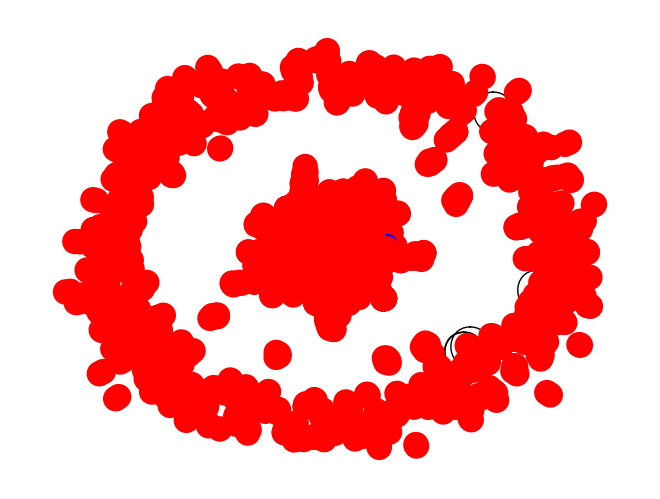

No. of nodes with information before Step: # 5  is  8
No. of nodes with information after Step: #:  5  is  11


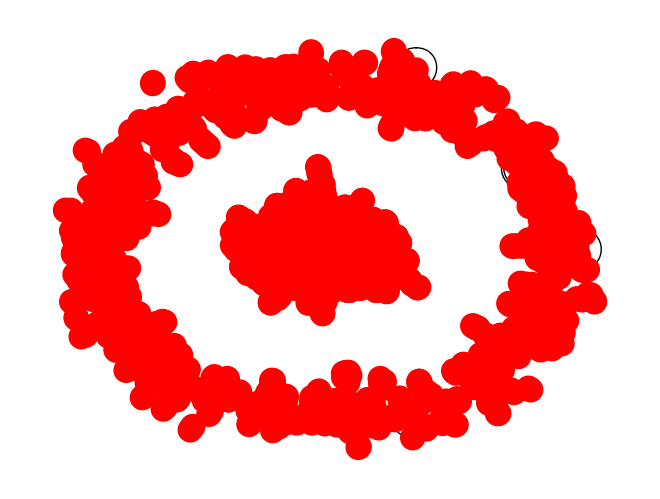

No. of nodes with information before Step: # 6  is  11
No. of nodes with information after Step: #:  6  is  11


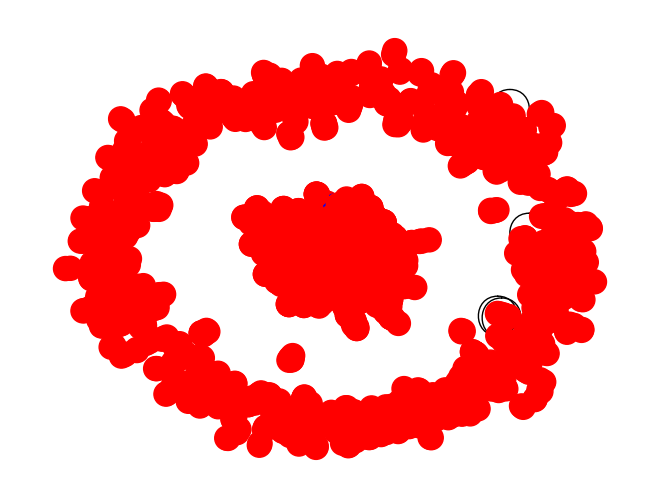

Iteration: # 2
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


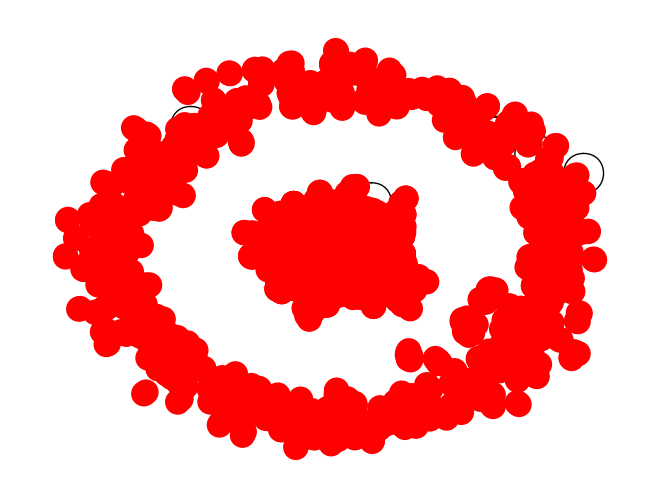

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  2


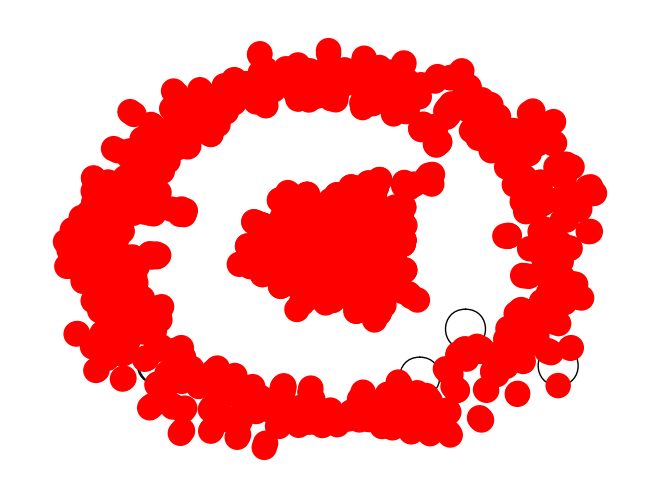

Iteration: # 3
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


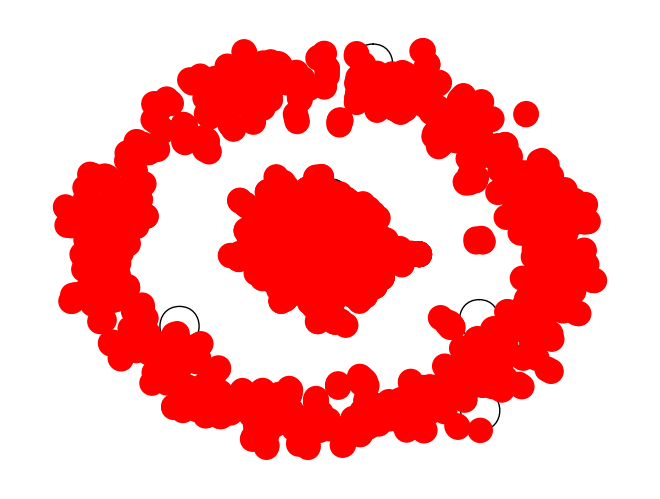

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  2


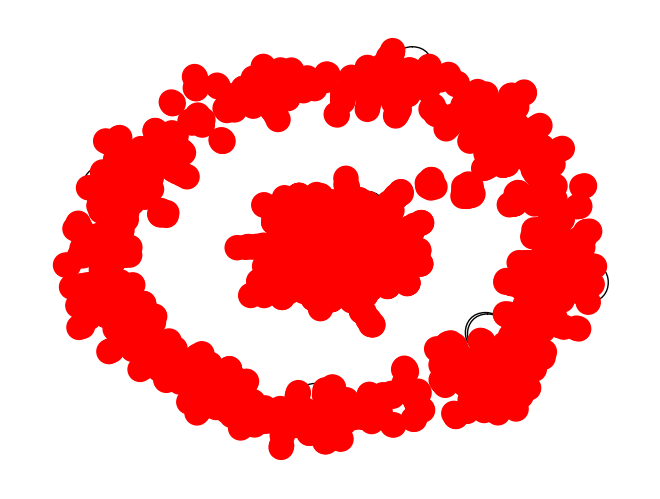

Iteration: # 4
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  3


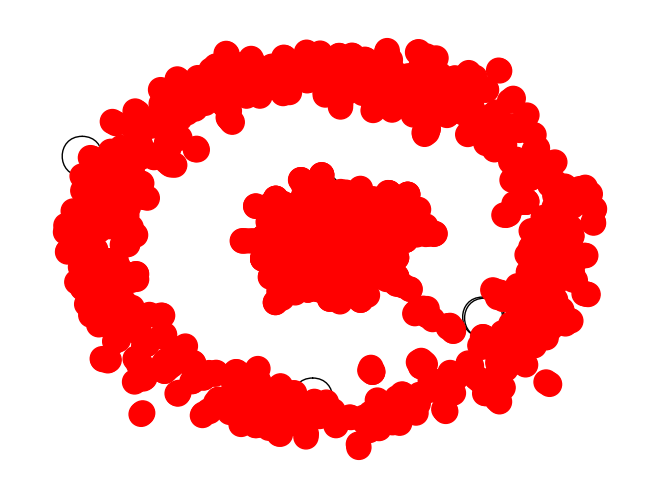

No. of nodes with information before Step: # 2  is  3
No. of nodes with information after Step: #:  2  is  4


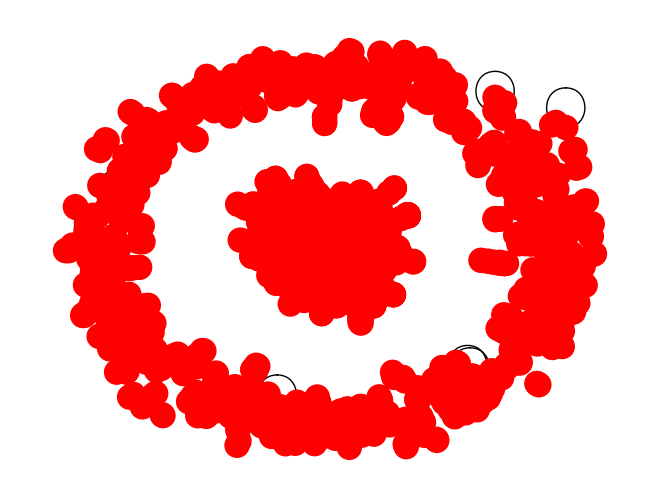

No. of nodes with information before Step: # 3  is  4
No. of nodes with information after Step: #:  3  is  4


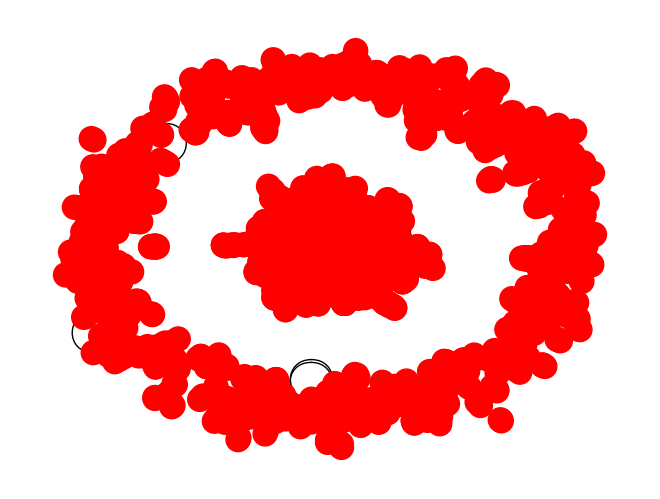

Iteration: # 5
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


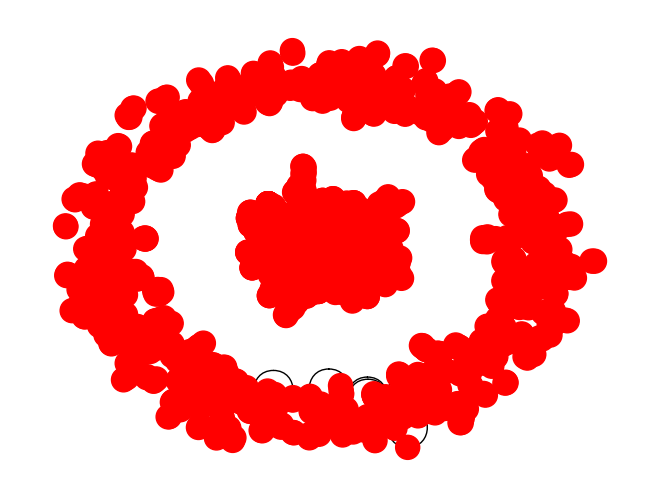

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  2


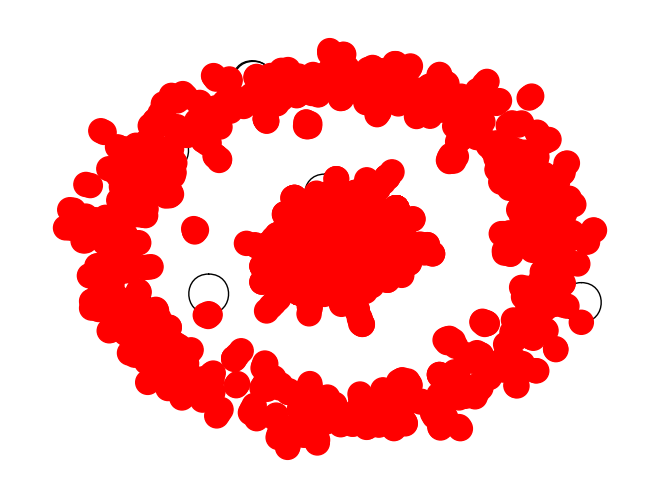

Iteration: # 6
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


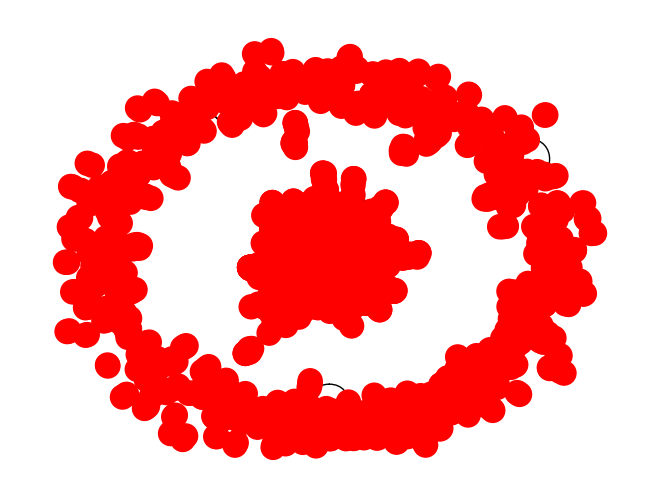

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  2


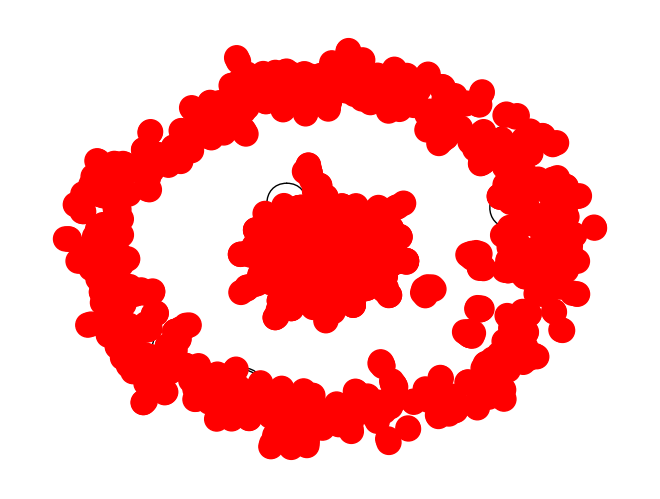

Iteration: # 7
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


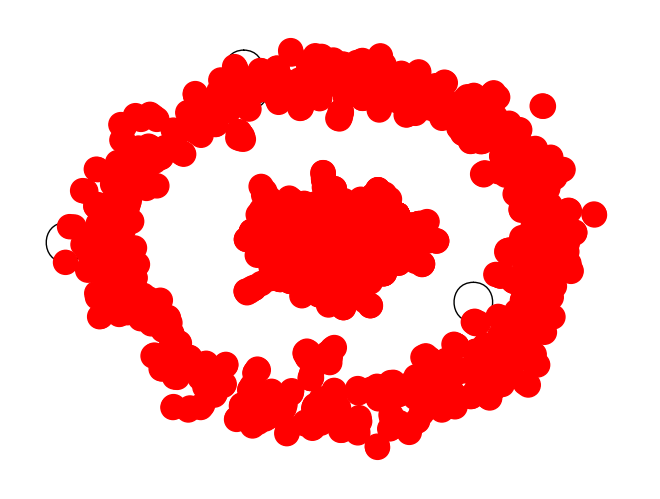

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  3


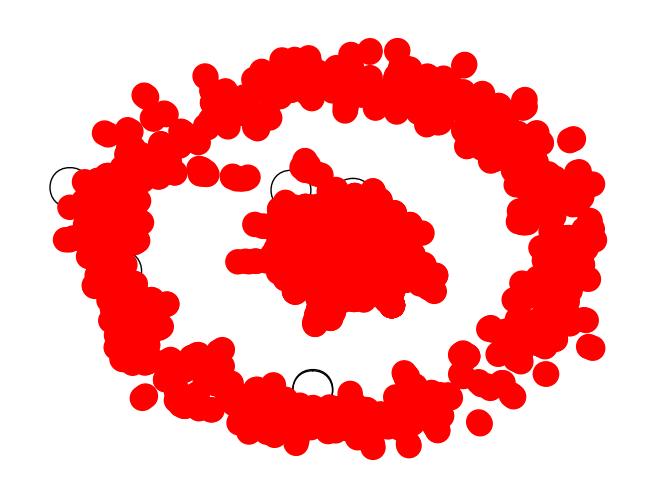

No. of nodes with information before Step: # 3  is  3
No. of nodes with information after Step: #:  3  is  4


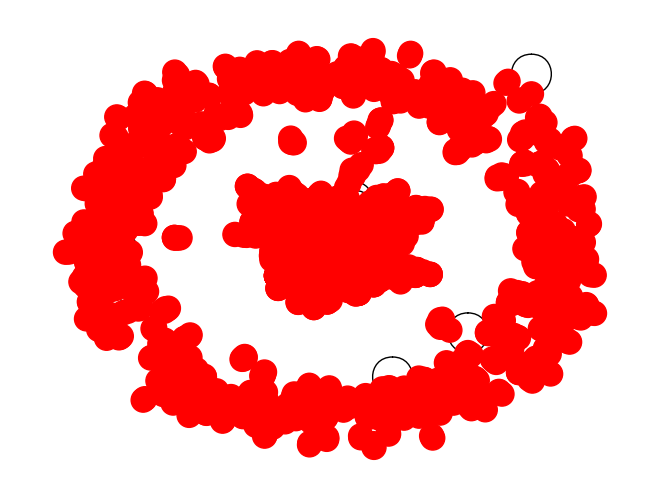

No. of nodes with information before Step: # 4  is  4
No. of nodes with information after Step: #:  4  is  4


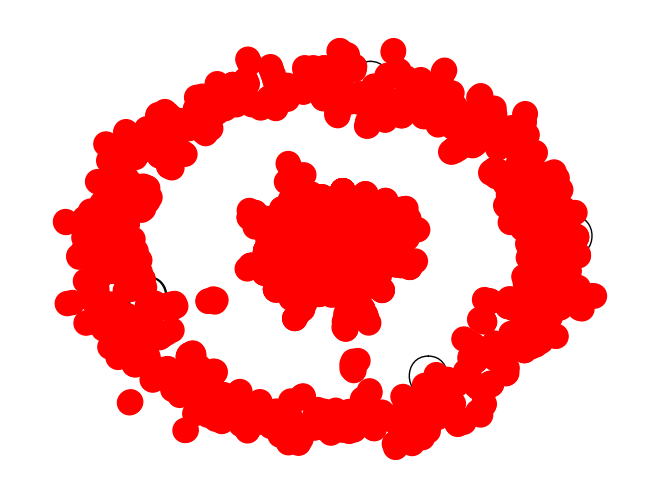

Iteration: # 8
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  1


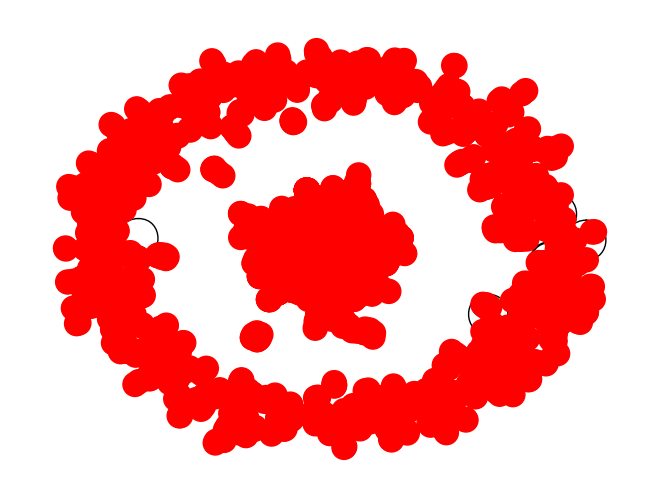

Iteration: # 9
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


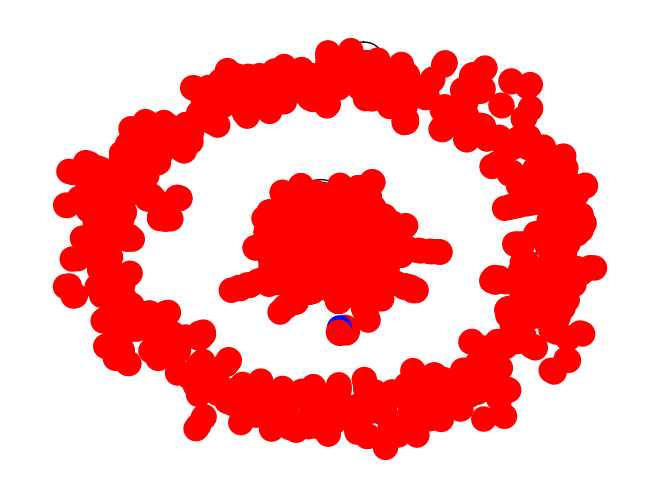

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  3


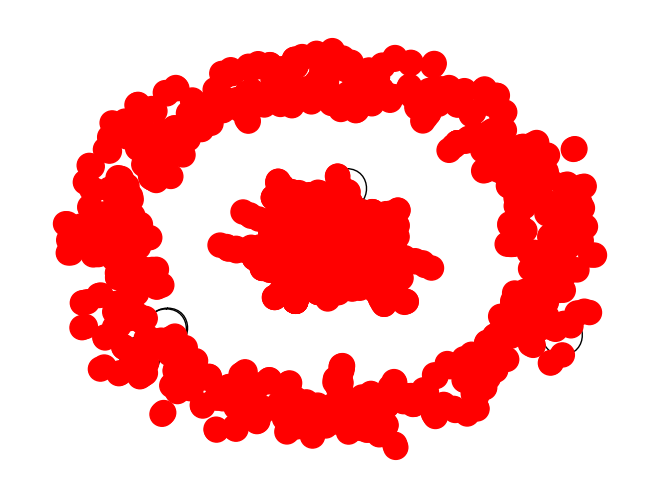

No. of nodes with information before Step: # 3  is  3
No. of nodes with information after Step: #:  3  is  3


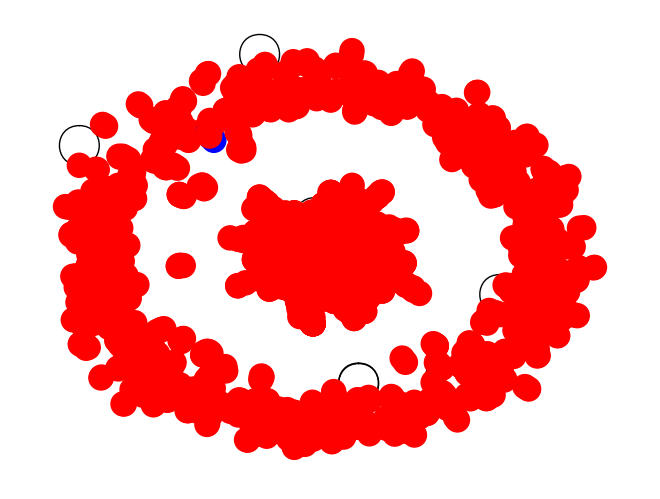

Iteration: # 10
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  3


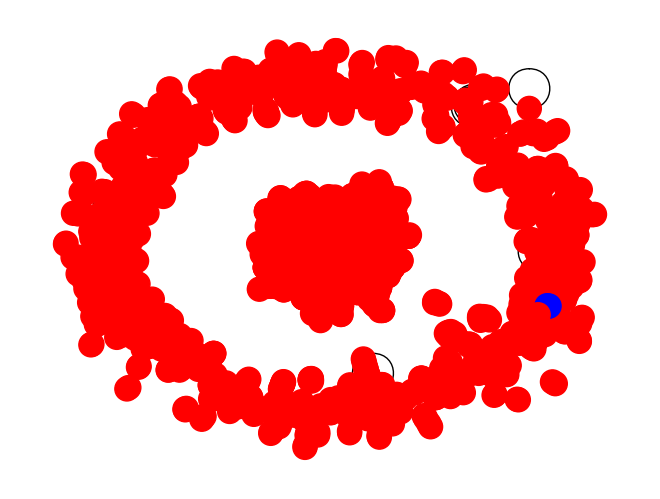

No. of nodes with information before Step: # 2  is  3
No. of nodes with information after Step: #:  2  is  4


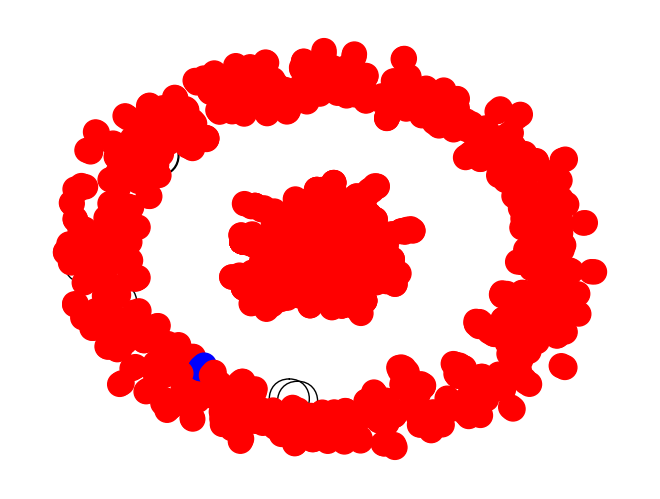

No. of nodes with information before Step: # 3  is  4
No. of nodes with information after Step: #:  3  is  4


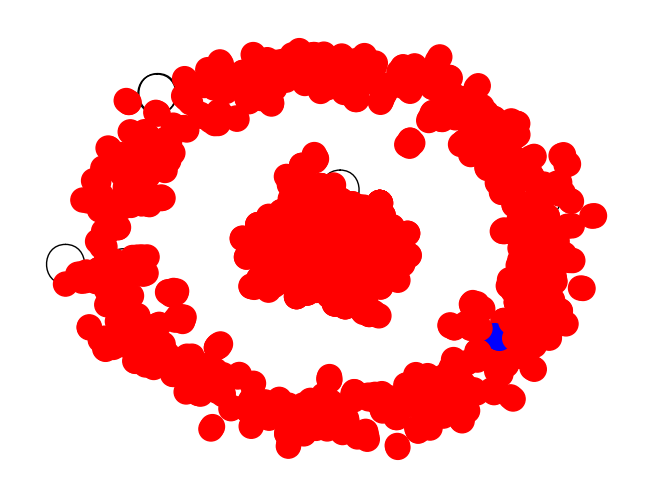

In [12]:

def run_ICM(network, start_node, activation_probs):
    activated_nodes = set()
    activated_nodes.add(start_node)
    newly_activated_nodes = set([start_node])
    steps = 0

    while newly_activated_nodes:
        steps += 1
        print("No. of nodes with information before Step: #",steps," is ",len(activated_nodes))
        currently_activated_nodes = newly_activated_nodes.copy()
        newly_activated_nodes.clear()
        for node in currently_activated_nodes:
            for neighbor in network.neighbors(node):
                if neighbor not in activated_nodes:
                    # Activate the neighbor with the assigned probability
                    if random.uniform(0, 1) <= activation_probs[node][neighbor]:
                        newly_activated_nodes.add(neighbor)
                        activated_nodes.add(neighbor)
        print("No. of nodes with information after Step: #: ",steps," is ",len(activated_nodes))
        visualize_network(network, activated_nodes)  # Visualize the network at each step

    return steps

def calculate_average_steps(network, activation_probs, num_trials=10):
    total_steps = 0
    for _ in range(num_trials):
        start_node = random.choice(list(network.nodes()))
        print("Iteration: #",_+1)
        total_steps += run_ICM(network, start_node, activation_probs)
    average_steps = total_steps / num_trials
    return average_steps

# Assign random activation probabilities to edges
activation_probs = assign_activation_probabilities(G)

# Calculate the average number of steps required
avg_steps = calculate_average_steps(G, activation_probs, 10)


In [13]:

print("Average number of steps required:", avg_steps)

Average number of steps required: 2.8
